# 1. Frame the Problem

1. Define the objective in business terms.  
2. How will your solution be used?  
3. What are the current solutions/workarounds (if any)?  
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)  
5. How should performance be measured?  
6. Is the performance measure aligned with the business objective?  
7. What would be the minimum performance needed to reach the business objective?  
8. What are comparable problems? Can you reuse experience or tools?  
9. Is human expertise available?  
10. How would you solve the problem manually?  
11. List the assumptions you or others have made so far.  
12. Verify assumptions if possible.  

This is the LA City Crime Database for 2020.  The goal here is to explore the data, transform the various formats as needed and see if there are any patterns to detect in it.


# 2. Get the Data
Note: automate as much as possible so you can easily get fresh data.  

1. List the data you need and how much you need.  
2. Find and document where you can get that data.  
3. Check how much space it will take.  
4. Check legal obligations, and get the authorization if necessary.  
5. Get access authorizations.  
6. Create a workspace (with enough storage space).  
7. Get the data.  
8. Convert the data to a format you can easily manipulate (without changing the data itself).  
9. Ensure sensitive information is deleted or protected (e.g., anonymized). 
10. Check the size and type of data (time series, sample, geographical, etc.).  

11. Sample a test set, put it aside, and never look at it (no data snooping!). 


In [1]:
# Numpy is the math library behind everything
# https://numpy.org/
import numpy as np

# Pandas has the data frame class used in a lot of work
# https://pandas.pydata.org/
import pandas as pd

# Matplotlib is my preferred plotting library
# https://matplotlib.org/
import matplotlib.pyplot as plt

# You will need to split up your data
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# You will want to cross validate your testing data
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
from sklearn.model_selection import cross_val_score

# Tune your parameters and find the best one
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

# Randomized search on hyper parameters.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

# You should use pipelines to automate the flow
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.pipeline import Pipeline

# Set the backend of matplotlib to work better with Jupyter
# https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
%matplotlib inline

Sci-Kit Tools for getting data:

1. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
2. https://scikit-learn.org/stable/datasets/index.html#datasets


Sources of Data
1. https://www.openml.org/
2. https://archive.ics.uci.edu/ml/datasets.php
3. https://github.com/awesomedata/awesome-public-datasets
4. https://www.data.gov/
5. https://www.kaggle.com/datasets
6. https://www.google.com/publicdata/directory
7. https://registry.opendata.aws/
8. https://azure.microsoft.com/en-us/services/open-datasets/
9. https://www.reddit.com/r/datasets/

Data downloaded as a CSV file from: https://data.lacity.org/A-Safe-City/Crime-Data-from-2020-to-Present/2nrs-mtv8

In [2]:
crimeDFOriginal = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [3]:
crimeDF = crimeDFOriginal

crimeDF.columns = map(str.upper, crimeDF.columns)
crimeDF.head()

,DR_NO,DATE RPTD,DATE OCC,TIME OCC,AREA,AREA NAME,RPT DIST NO,PART 1-2,CRM CD,CRM CD DESC,...,STATUS,STATUS DESC,CRM CD 1,CRM CD 2,CRM CD 3,CRM CD 4,LOCATION,CROSS STREET,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,190101087,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,510,1,Central,156,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,IC,Invest Cont,626,NaN,NaN,NaN,300 E 5TH ST,NaN,34.0449,-118.2458
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
import geopandas as gpd
import descartes

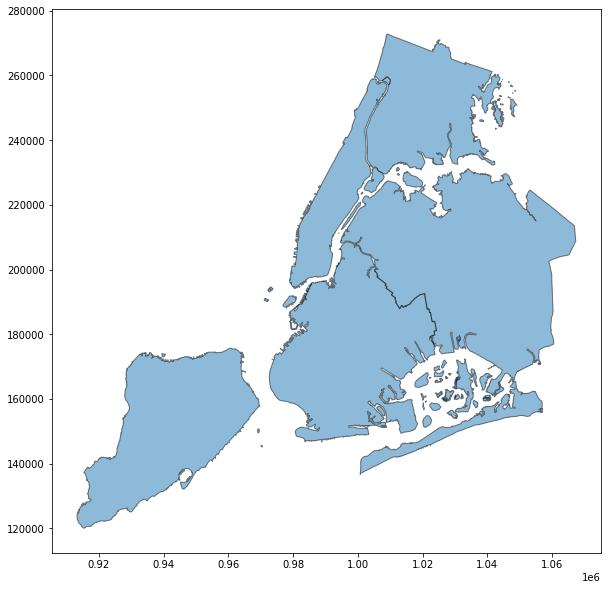

In [5]:
df = gpd.read_file(gpd.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

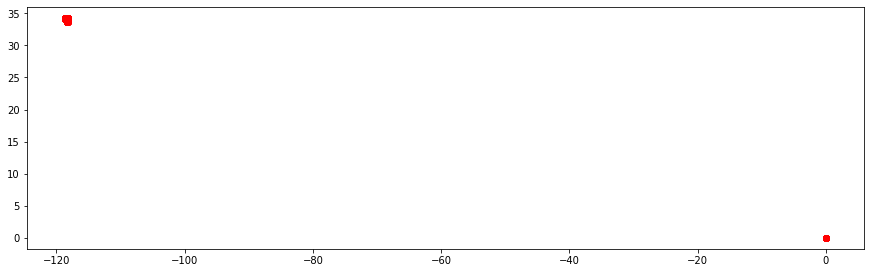

In [6]:
#LAMap = gpd.read_file("DRP_COUNTY_BOUNDARY.shp")
#LAMap = gpd.read_file("l.a. county neighborhood (v6).shp")
LAMap = gpd.read_file("lapd division.shp")
#LAMap = gpd.read_file("tl_2015_06037_addrfeat.shp")
fix, ax = plt.subplots(figsize=(15,15))
LAMap.plot(ax=ax)

#ax = LAMap.plot(figsize=(15,15))

#gdf = gpd.GeoDataFrame(
#    crimeDF, geometry=gpd.points_from_xy(crimeDF.LON, crimeDF.LAT))
#print(gdf.head())
#gdf.plot(ax=ax, color='red')
#plt.show()
#ax = plt.subplots(figsize=(15,15))
plt.scatter(crimeDF.LON, crimeDF.LAT, color="red")

In [7]:
print(crimeDF.LON[:933], crimeDF.LAT[:933])

0     -118.2978
1     -118.2545
2     -118.2458
3     -118.4019
4     -118.4468
         ...   
928   -118.2577
929   -118.2687
930   -118.2603
931   -118.2714
932      0.0000
Name: LON, Length: 933, dtype: float64 0      34.0141
1      34.0459
2      34.0449
3      34.1685
4      34.2198
        ...   
928    34.0480
929    34.0348
930    34.0364
931    34.0354
932     0.0000
Name: LAT, Length: 933, dtype: float64


In [8]:
#https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
indexNames = crimeDF[ crimeDF['LAT'] == 0 ].index
print(indexNames)
crimeDF.drop(indexNames , inplace=True)

Int64Index([  932,  3524,  3698, 11813, 15378, 21584, 29614, 30957, 31201,
            32588,
            ...
            60987, 61008, 61015, 61080, 61094, 61103, 61112, 61122, 61125,
            61137],
           dtype='int64', length=394)


In [9]:
len(crimeDF.AREA.unique())

21

In [10]:
areaNameList=crimeDF["AREA NAME"].unique()
print(areaNameList)

['Southwest' 'Central' 'N Hollywood' 'Mission' 'Pacific' 'Northeast'
 'West LA' 'Harbor' 'Foothill' '77th Street' 'Southeast' 'Newton'
 'Rampart' 'West Valley' 'Olympic' 'Devonshire' 'Hollywood' 'Hollenbeck'
 'Wilshire' 'Van Nuys' 'Topanga']


In [11]:
southWestCrimeIndex = (crimeDF["AREA NAME"] == "Southwest")

In [12]:
crimeAreaDict = {}
for area in areaNameList:
    index = (crimeDF["AREA NAME"] == area)
    tempDF = crimeDF[index]
    crimeAreaDict[area] = tempDF
    del(tempDF)

In [13]:
southWestCrime = crimeDF[southWestCrimeIndex]
print(len(southWestCrime))
southWestCrime.head()

3545


,DR_NO,DATE RPTD,DATE OCC,TIME OCC,AREA,AREA NAME,RPT DIST NO,PART 1-2,CRM CD,CRM CD DESC,...,STATUS,STATUS DESC,CRM CD 1,CRM CD 2,CRM CD 3,CRM CD 4,LOCATION,CROSS STREET,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
741,200300601,03/19/2020 12:00:00 AM,03/18/2020 12:00:00 AM,1200,3,Southwest,335,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330,NaN,NaN,NaN,2600 W 30TH ST,NaN,34.0276,-118.3236
916,200307803,03/03/2020 12:00:00 AM,02/15/2020 12:00:00 AM,1800,3,Southwest,358,1,480,BIKE - STOLEN,...,IC,Invest Cont,480,NaN,NaN,NaN,600 W MCCARTHY WY,NaN,34.0210,-118.2823
1134,200308014,03/05/2020 12:00:00 AM,02/01/2020 12:00:00 AM,10,3,Southwest,357,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354,NaN,NaN,NaN,1200 W 37TH ST,NaN,34.0210,-118.2944
1143,200307912,03/04/2020 12:00:00 AM,03/04/2020 12:00:00 AM,1949,3,Southwest,321,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442,NaN,NaN,NaN,3500 S LA CIENEGA BL,NaN,34.0242,-118.3722


/home/ptracton/MachineLearning/ml/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


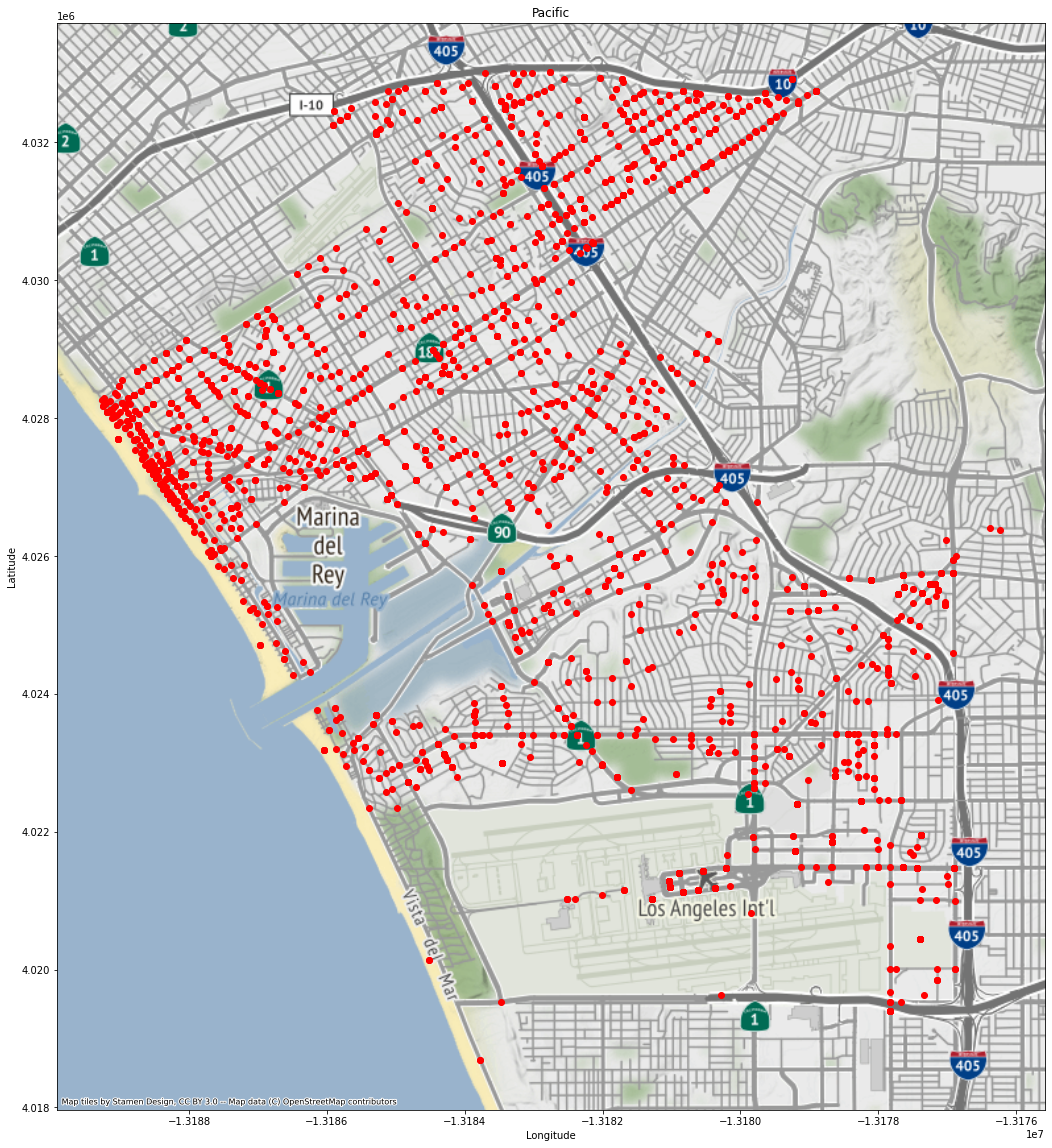

In [14]:
from shapely.geometry import Polygon
import contextily as ctx
#https://stackoverflow.com/questions/56559520/change-background-map-for-contextily 
#plt.figure(figsize=(15, 15))   
district = "Pacific"
#gdf = gpd.GeoDataFrame(crimeAreaDict["Devonshire"], geometry=gpd.points_from_xy(crimeAreaDict["Devonshire"].LON, crimeAreaDict["Devonshire"].LAT))
gdf = gpd.GeoDataFrame(crimeAreaDict[district], geometry=gpd.points_from_xy(crimeAreaDict[district].LON, crimeAreaDict[district].LAT))
gdf = gpd.GeoDataFrame(gdf, crs= {"init": "epsg:4326"}) # Create a georeferenced dataframe  
gdf = gdf.to_crs(epsg=3857) # reproject it in Web mercator
ax = gdf.plot(figsize=(20, 20), color="red")
ax.set_title(district)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ctx.add_basemap(ax)



['THEFT PLAIN - PETTY ($950 & UNDER)' 'ROBBERY' 'BURGLARY FROM VEHICLE'
 'BATTERY - SIMPLE ASSAULT'
 'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)' 'BURGLARY'
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)' 'BUNCO, GRAND THEFT'
 'RAPE, FORCIBLE' 'THEFT OF IDENTITY'
 'INTIMATE PARTNER - AGGRAVATED ASSAULT' 'BRANDISH WEAPON' 'TRESPASSING'
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'
 'VEHICLE - STOLEN' 'BATTERY WITH SEXUAL CONTACT' 'BURGLARY, ATTEMPTED'
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)'
 'CREDIT CARDS, FRAUD USE ($950 & UNDER' 'ORAL COPULATION'
 'CHILD ANNOYING (17YRS & UNDER)' 'OTHER MISCELLANEOUS CRIME'
 'BIKE - STOLEN' 'INTIMATE PARTNER - SIMPLE ASSAULT'
 'CRIMINAL THREATS - NO WEAPON DISPLAYED'
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'
 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)'
 'FAILURE TO YIELD' 'ATTEMPTED ROBBERY' 'ARSON'

/home/ptracton/MachineLearning/ml/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


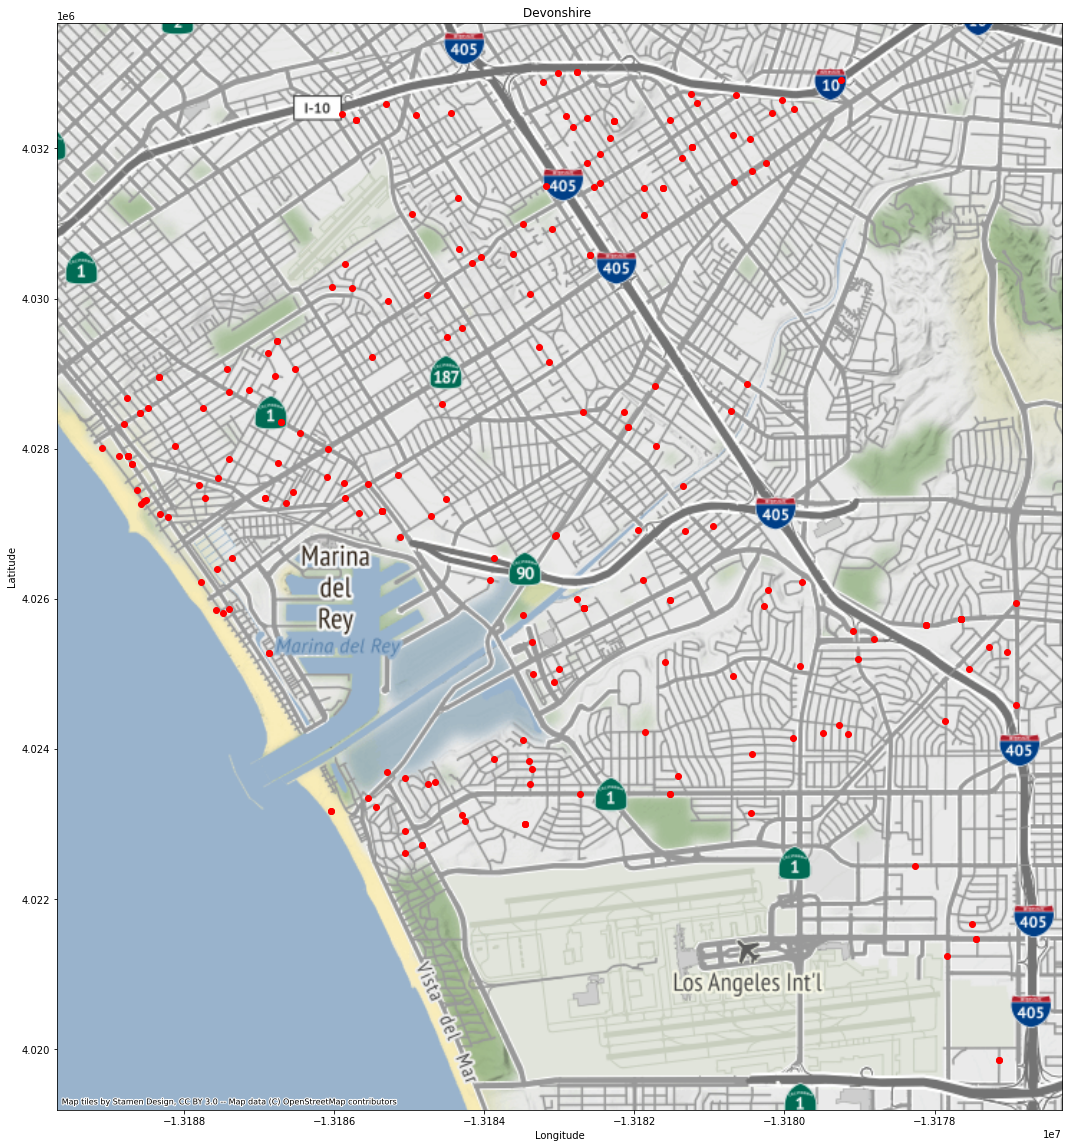

In [15]:
crimesNameList = crimeAreaDict[district]["CRM CD DESC"].unique()
print(crimesNameList)
#homeLocation = (34.276050,-118.585010)


index1 = crimeDF["AREA NAME"] ==  district #& crimeDF["CRM CD DESC"]=="BURGLARY"
index2 = crimeDF["CRM CD DESC"]=="BURGLARY"
index = index1 & index2
#print(index1 & index2)
#index = crimeDF[ (crimeDF['AREA NAME'] == "Devonshire") & (crimeDF['CRM CD DESC'] == 'BURGLARY') ].index
crimes = crimeDF[index]
print("LOCATION = {} ".format(crimes.LOCATION))
#print("DATE OCCUR = {} ".format(crimes["DATE OCC"]))
#print("LONGITUDE = {} LATTITUDE = {}".format(crimes.LON, crimes.LAT))
#crimes.head()
gdf = gpd.GeoDataFrame(crimes, geometry=gpd.points_from_xy(crimes.LON, crimes.LAT))
gdf = gpd.GeoDataFrame(gdf, crs= {"init": "epsg:4326"}) # Create a georeferenced dataframe  
gdf = gdf.to_crs(epsg=3857) # reproject it in Web mercator
ax = gdf.plot(figsize=(20, 20), color="red")
ax.set_title("Devonshire ")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ctx.add_basemap(ax)


# 3. Explore the Data
Note: try to get insights from a field expert for these steps.  

1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary).
2. Create a Jupyter notebook to keep record of your data exploration.  
3. Study each attribute and its characteristics:  
    - Name  
    - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
    - % of missing values  
    - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
    - Possibly useful for the task?  
    - Type of distribution (Gaussian, uniform, logarithmic, etc.)
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.  
6. Study the correlations between attributes.  
7. Study how you would solve the problem manually.  
8. Identify the promising transformations you may want to apply.  
9. Identify extra data that would be useful (go back to "Get the Data" on page 502).  
10. Document what you have learned.  

# 4. Prepare the Data
Notes:    
- Work on copies of the data (keep the original dataset intact).  
- Write functions for all data transformations you apply, for five reasons:  
    - So you can easily prepare the data the next time you get a fresh dataset  
    - So you can apply these transformations in future projects  
    - To clean and prepare the test set  
    - To clean and prepare new data instances  
    - To make it easy to treat your preparation choices as hyperparameters  

1. Data cleaning:  
    - Fix or remove outliers (optional).  
    - Fill in missing values (e.g., with zero, mean, median...) or drop their rows (or columns).  
2. Feature selection (optional):  
    - Drop the attributes that provide no useful information for the task.  
3. Feature engineering, where appropriates:  
    - Discretize continuous features.  
    - Decompose features (e.g., categorical, date/time, etc.).  
    - Add promising transformations of features (e.g., log(x), sqrt(x), x^2, etc.).
    - Aggregate features into promising new features.  
4. Feature scaling: standardize or normalize features.  

# 5. Explore Models
Notes: 
- If the data is huge, you may want to sample smaller training sets so you can train many different models in a reasonable time (be aware that this penalizes complex models such as large neural nets or Random Forests).  
- Once again, try to automate these steps as much as possible.    

1. Train many quick and dirty models from different categories (e.g., linear, naive, Bayes, SVM, Random Forests, neural net, etc.) using standard parameters.  
2. Measure and compare their performance.  
    - For each model, use N-fold cross-validation and compute the mean and standard deviation of their performance. 
3. Analyze the most significant variables for each algorithm.  
4. Analyze the types of errors the models make.  
    - What data would a human have used to avoid these errors?  
5. Have a quick round of feature selection and engineering.  
6. Have one or two more quick iterations of the five previous steps.  
7. Short-list the top three to five most promising models, preferring models that make different types of errors.  

# 6. Fine Tune Models
Notes:  
- You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.   
- As always automate what you can.    

1. Fine-tune the hyperparameters using cross-validation.  
    - Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., should I replace missing values with zero or the median value? Or just drop the rows?).  
    - Unless there are very few hyperparamter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using a Gaussian process priors, as described by Jasper Snoek, Hugo Larochelle, and Ryan Adams ([https://goo.gl/PEFfGr](https://goo.gl/PEFfGr)))  
2. Try Ensemble methods. Combining your best models will often perform better than running them invdividually.  
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error.

> Don't tweak your model after measuring the generalization error: you would just start overfitting the test set.  
  

# 7. Present Solution
1. Document what you have done.  
2. Create a nice presentation.  
    - Make sure you highlight the big picture first.  
3. Explain why your solution achieves the business objective.  
4. Don't forget to present interesting points you noticed along the way.  
    - Describe what worked and what did not.  
    - List your assumptions and your system's limitations.  
5. Ensure your key findings are communicated through beautiful visualizations or easy-to-remember statements (e.g., "the median income is the number-one predictor of housing prices").  

# 8. Launch and Monitor
1. Get your solution ready for production (plug into production data inputs, write unit tests, etc.).  
2. Write monitoring code to check your system's live performance at regular intervals and trigger alerts when it drops.  
    - Beware of slow degradation too: models tend to "rot" as data evolves.   
    - Measuring performance may require a human pipeline (e.g., via a crowdsourcing service).  
    - Also monitor your inputs' quality (e.g., a malfunctioning sensor sending random values, or another team's output becoming stale). This is  particulary important for online learning systems.  
3. Retrain your models on a regular basis on fresh data (automate as much as possible).  
